In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from IPython.display import clear_output

%matplotlib inline

In [2]:
class Logger(tf.keras.callbacks.Callback):

    def on_epoch_begin(self, epoch, logs=None):
        clear_output(wait=True)
        print("Epoch " + str(epoch) + " begins")
    def on_test_begin(self, logs=None):
        clear_output(wait=True)
        print("Testing begins")
    def on_test_end(self, logs=None):
        clear_output(wait=True)
        print("Testing ends")
    def on_train_begin(self, logs=None):
        clear_output(wait=True)
        print("Training begins")
    def on_train_end(self, logs=None):
        clear_output(wait=True)
        print("Training ends")

In [7]:
tf.keras.backend.clear_session()

x = tf.constant ([[0,0], [0,1], [1,0], [1,1]])
y = tf.constant ([0, 1, 1, 0])

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[2], batch_size=4),
    tf.keras.layers.Dense(2, activation="tanh", kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Dense(1, activation="linear")
])

optimizerSGD = tf.keras.optimizers.SGD()
loss = tf.keras.losses.MeanAbsoluteError()

#Adam Stage
model.compile (optimizerSGD, loss, metrics=['accuracy'])

clear_output(wait=True)
history = model.fit(x,y, epochs=10000, verbose=0, callbacks=[Logger()])

Training ends


In [8]:
print(model.predict ([[0,0]]))
print(model.predict ([[0,1]]))
print(model.predict ([[1,0]]))
print(model.predict ([[1,1]]))

[[2.3841858e-07]]
[[0.98605776]]
[[0.99898684]]
[[-0.00939727]]


(0, 1)

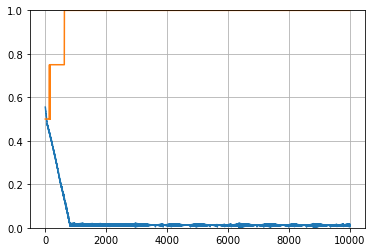

In [9]:
pd.DataFrame (history.history) 
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.grid(True) 
plt.gca().set_ylim(0,1)